# Single Layer Preceptron with One output

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import sys

path = "DataSets\diabetes.csv"
test_path = "DataSets\diabetes.csv"

In [2]:
def preprocess(path):
    dataset = pd.read_csv(path, header=0)
    data = dataset.values
    
    x = data[:,:-1]
    y = data[:,-1]
    
    lb = LabelBinarizer()
    lb.fit(y)
    y = lb.transform(y)
    
    return x, y

In [3]:
xtrain, ytrain = preprocess(path)

In [4]:
def Perceptron(xtrain, ytrain):
    np.random.seed(1)
    input_layer_nodes = xtrain.shape[1]
    output_layer_nodes = ytrain.shape[1]
    num_samples = xtrain.shape[0]
    iterations = 10
    alpha = 0.1
    final_prediction = []
    
    weights_input_output = 0.2*np.random.random((input_layer_nodes, output_layer_nodes)) - 0.1
    
    for iteration in range(iterations):
        error, correct_cnt = 0.0, 0
        
        for i in range(num_samples):
            input_layer = xtrain[i:i+1]
            target = ytrain[i:i+1]
            prediction = 0 if input_layer.dot(weights_input_output) < 0.5 else 1
            
            if iteration == (iterations)-1:
                final_prediction.append(prediction)
            correct_cnt += int(prediction) == target
            
            delta = prediction - target
            weights_input_output -= delta[0][0] * alpha
        
        sys.stdout.write("\r" + " Correct_cnt: " + str(correct_cnt[0][0]))

    return final_prediction, correct_cnt

In [17]:
def Plot(x1,x2, y):
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Error")
    ax.set_title("Error Plot")
    plt.scatter(x1,x2, c=y, lw=6)
    plt.show()

In [7]:
def Accuracy(target, predictions, correct_cnt):
    
    TP, TN, FP, FN, Accuracy = 0,0,0,0,0.0
    num_samples = len(target)
    
    Accuracy = correct_cnt / num_samples * 100
    
    for i in range(num_samples):
        if target[i] == 0:
            FP += 1 if predictions[i] == 1 else 0
            TN += 1 if predictions[i] == 0 else 0
        elif target[i] == 1:
            TP += 1 if predictions[i] == 1 else 0
            FN += 1 if predictions[i] == 0 else 0
            
    return ("Accuracy; %.4f %s, TP: %s, FP: %s, TN: %s, FN: %s " % (Accuracy, "%", TP, FP, TN, FN))

# Predicting Diabetes DataSet

In [299]:
predictions, correct_cnt = Perceptron(xtrain, ytrain)
Accuracy(ytrain, predictions, correct_cnt)

 Correct_cnt: 436

'Accuracy; 56.7708 %, TP: 102, FP: 166, TN: 334, FN: 166 '

# OR Gate : Classification

In [18]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

predictions, correct_cnt = Perceptron(x,y)
Accuracy(y, predictions, correct_cnt)

 Correct_cnt: 4

'Accuracy; 100.0000 %, TP: 3, FP: 0, TN: 1, FN: 0 '

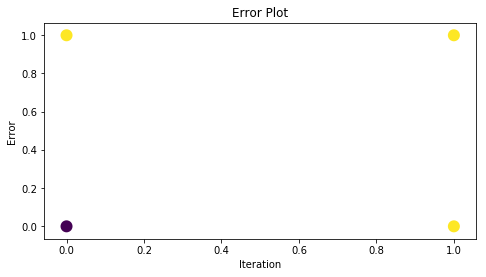

In [19]:
Plot(x[:,0],x[:,1], y)

# AND Gate : Classification

In [20]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[0],[0],[1]])

predictions, correct_cnt = Perceptron(x,y)
Accuracy(y, predictions, correct_cnt)

 Correct_cnt: 4

'Accuracy; 100.0000 %, TP: 1, FP: 0, TN: 3, FN: 0 '

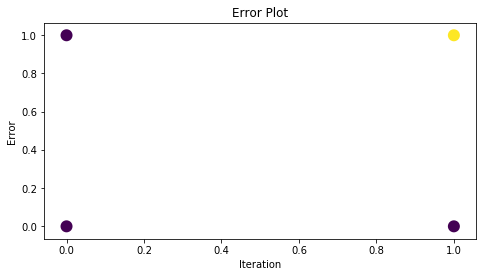

In [21]:
Plot(x[:,0],x[:,1], y)

# XOR Gate : Classification

In [22]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

predictions, correct_cnt = Perceptron(x,y)
Accuracy(y, predictions, correct_cnt)

 Correct_cnt: 2

'Accuracy; 50.0000 %, TP: 1, FP: 1, TN: 1, FN: 1 '

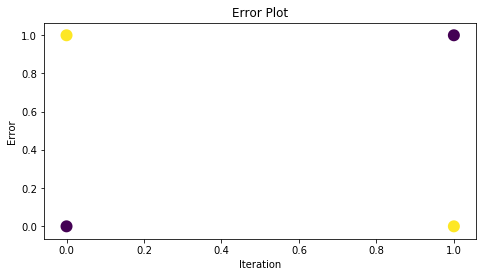

In [23]:
Plot(x[:,0],x[:,1], y)

In [24]:
#####################################################################################################
# Simple OR Gate or AND Gate can be classified by the single perception 
# (Because of its Linear Decision Boundary)
#
# However, XOR Gate cannot be classified by so, instead it needs more nodes to classify it correctly 
# (Because of its NON-Linear Decision Boundary)
#####################################################################################################